In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from scipy.stats import zscore,boxcox
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('abalone.data', sep=',',header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.columns=['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.index=range(1,4178)

In [5]:
df['Age']=df['Rings']+ 1.5

In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [7]:
df.shape

(4177, 10)

In [8]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
Age               float64
dtype: object

Text(0.5, 1.0, 'Distibution of Data W.R.T to Sex')

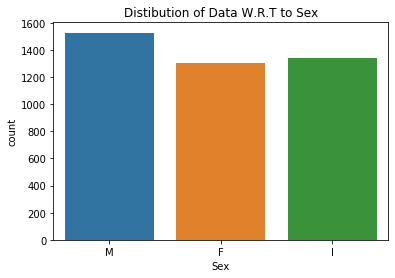

In [9]:
#countplot for sex
sns.countplot(df['Sex'])
plt.title('Distibution of Data W.R.T to Sex')

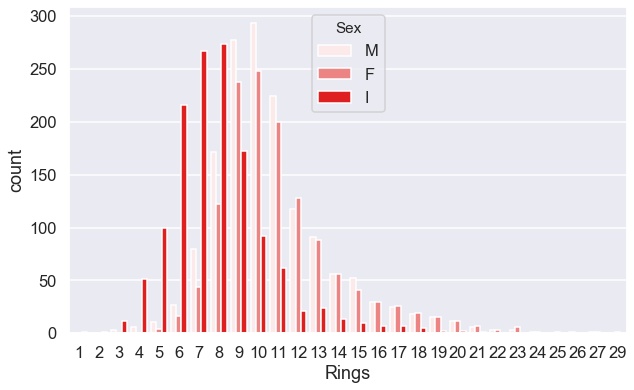

In [10]:
plt.figure(figsize=(10,6))
sns.set(context='talk')
sns.countplot(x='Rings', hue='Sex',data=df,color='red')

Text(0.5, 1.0, 'Distribution graph of age of abalone')

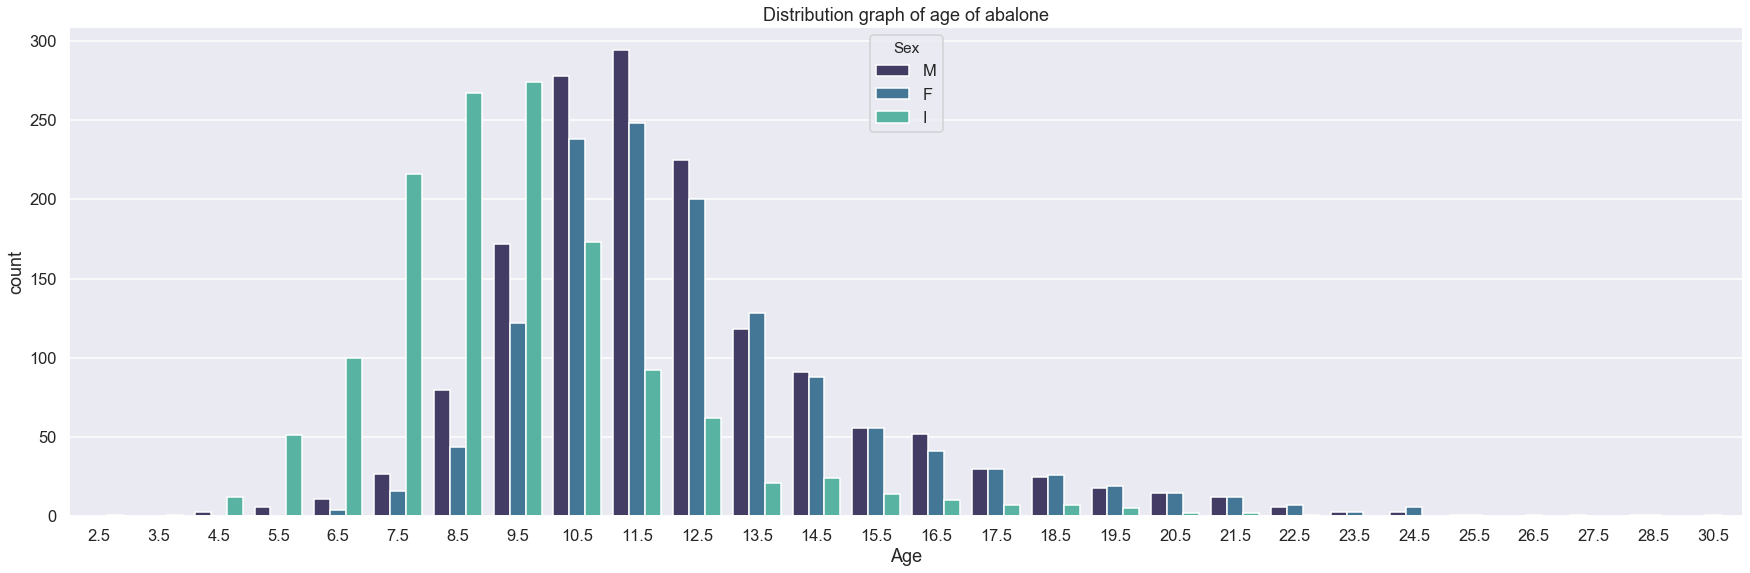

In [11]:
plt.figure(figsize=(30,9))
sns.set(context='talk',font_scale=1)
sns.countplot(x='Age',data=df,hue='Sex',palette='mako')
plt.title('Distribution graph of age of abalone')

In [12]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [13]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [14]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

# Statistical Summary

In [15]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 1 to 4177
Data columns (total 10 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole_weight      4177 non-null float64
Shucked_weight    4177 non-null float64
Viscera_weight    4177 non-null float64
Shell_weight      4177 non-null float64
Rings             4177 non-null int64
Age               4177 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


now : lets check weather thedata is normally distributted or not

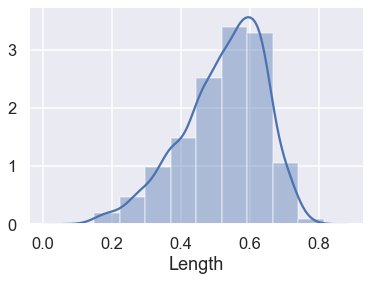

In [17]:
#through distplot
sns.distplot(df['Length'],bins=10)

In [18]:
sns.distplot?

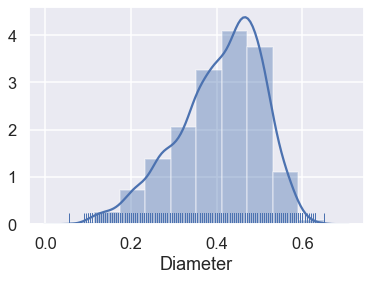

In [19]:
sns.distplot(df['Diameter'],rug=True,bins=10)

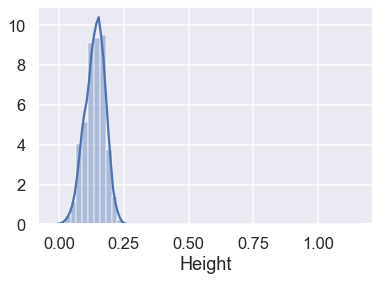

In [20]:
sns.distplot(df['Height'],kde=True)

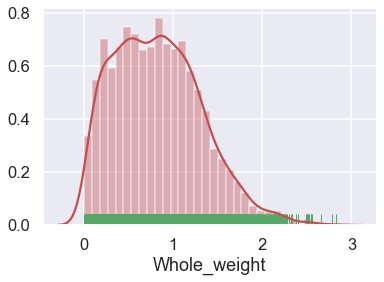

In [21]:
sns.distplot(df['Whole_weight'],rug=True, rug_kws={"color": "g"},color='r')

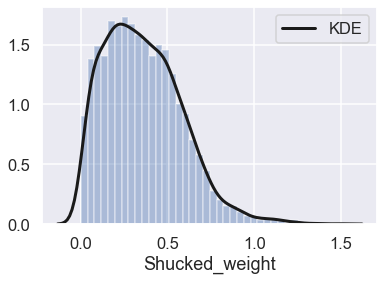

In [22]:
sns.distplot(df['Shucked_weight'],kde_kws={"color": "k", "lw": 3, "label": "KDE"})

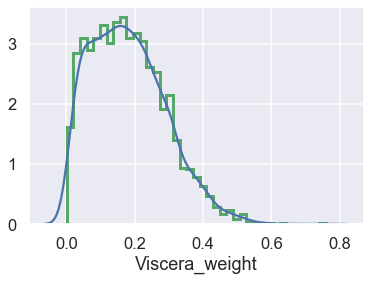

In [23]:
sns.distplot(df['Viscera_weight'],hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "g"})

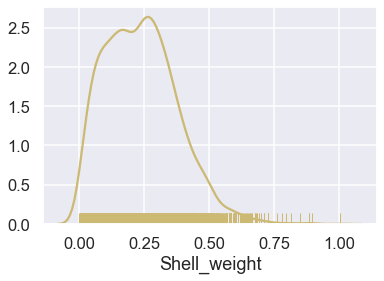

In [24]:
sns.distplot(df['Shell_weight'],rug=True,hist=False,color='y')

# check for outliers

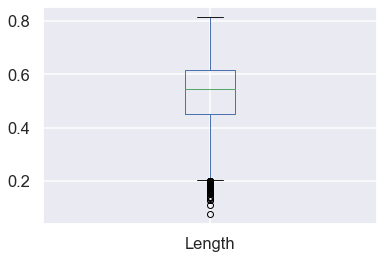

In [25]:
df['Length'].plot.box()

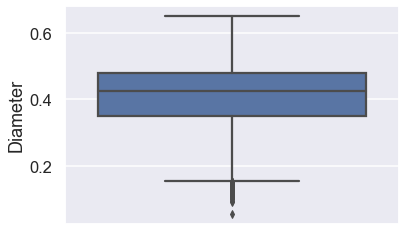

In [26]:
sns.boxplot(y='Diameter',data=df)

In [27]:
col=df.columns
print(col)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings', 'Age'],
      dtype='object')


In [28]:
sns.boxplot?


# There are outliers present in the dataset>>>

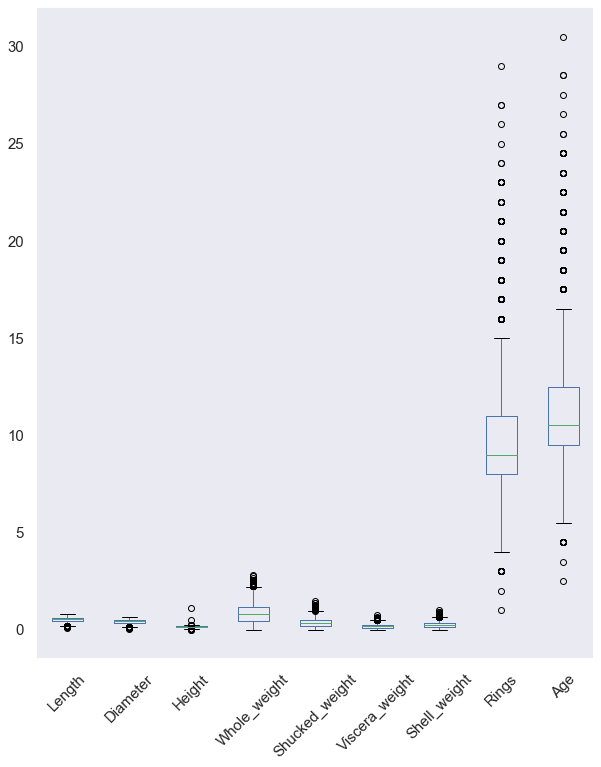

In [29]:
plt.figure(figsize=(10,12))
boxplot=df.boxplot(grid=False,rot=45,fontsize=15)

In [30]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [31]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [32]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
Age               float64
dtype: object

In [33]:
df.corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.420884
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000


In [34]:
lb=LabelEncoder()
df['Sex']=lb.fit_transform(df['Sex'])
#using label encoder we will transfer categorical data of Sex into numerical data like :0,1,2

In [35]:
df['Sex'].unique()

array([2, 0, 1], dtype=int64)

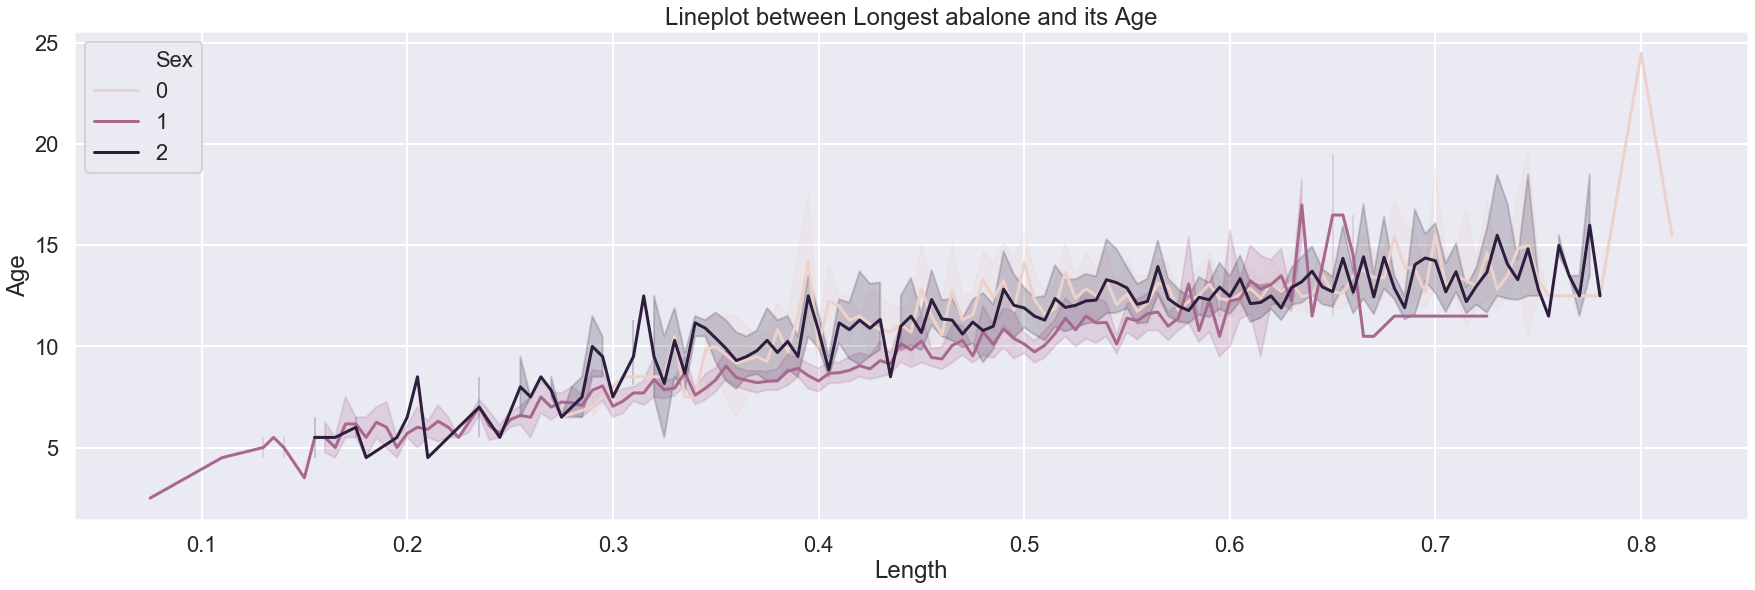

In [36]:
plt.figure(figsize=(30,9))
sns.set_context('poster',font_scale=1.0)
plt.title('Lineplot between Longest abalone and its Age')
sns.lineplot(x='Length',data=df,hue='Sex',y='Age',dashes=True)

i.e oldest female abalone  is the longest in size

Text(0.5, 1.0, 'lineplot of widest abalone W.r.t Age')

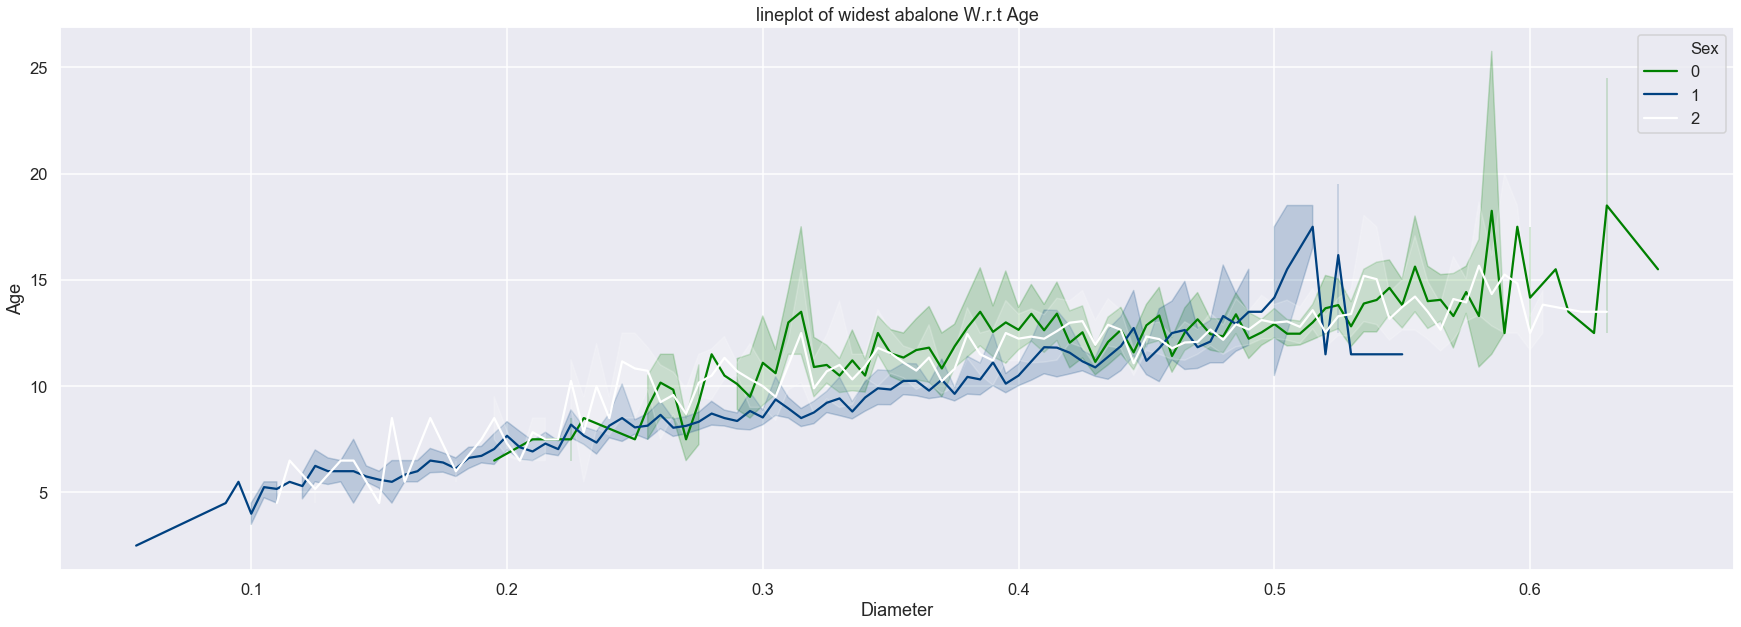

In [37]:
plt.figure(figsize=(30,10))
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=1)
sns.lineplot(x='Diameter',data=df,hue='Sex',palette='ocean',y='Age')
plt.title('lineplot of widest abalone W.r.t Age')

i.e oldest female abalone is the widest in shape or diameter

Text(0.5, 1.0, 'lineplot of Hieghest abalone wrt to age')

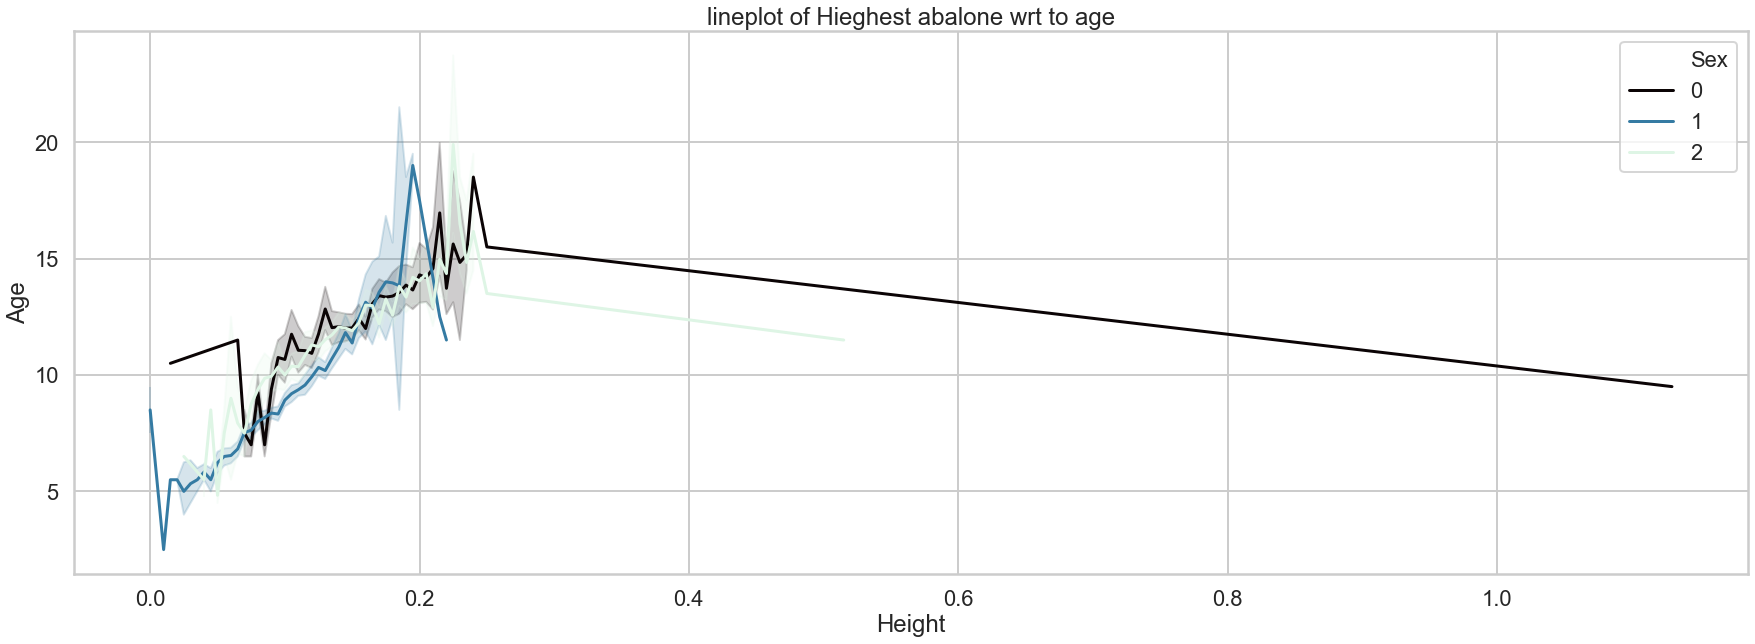

In [38]:
plt.figure(figsize=(30,10))
sns.set(style='whitegrid')
sns.set_context('poster',font_scale=1)
sns.lineplot(x='Height',data=df,hue='Sex',palette='mako',y='Age')
plt.title('lineplot of Hieghest abalone wrt to age')

i.e younger female or mature female is having the maximum height

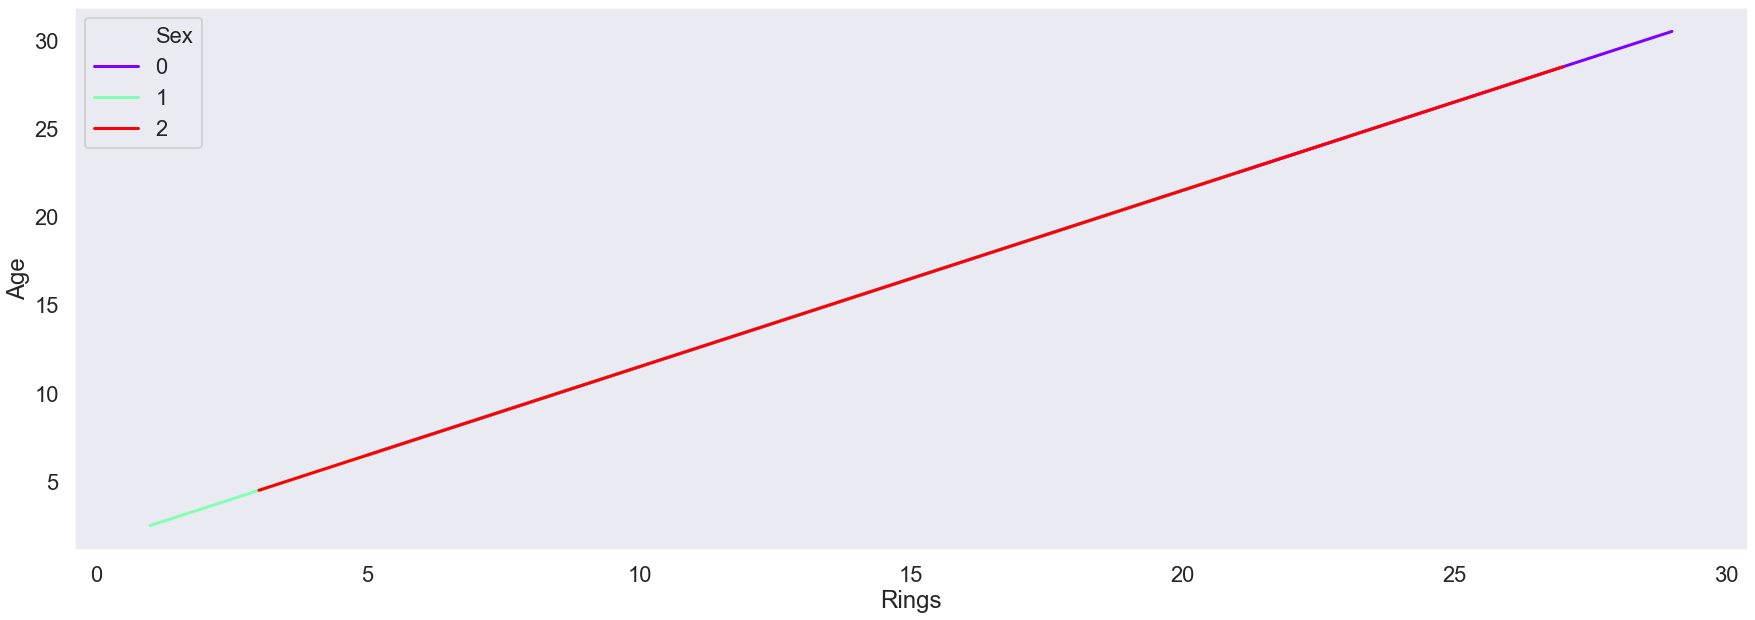

In [39]:
plt.figure(figsize=(30,10))
sns.set(style='dark')
sns.set_context('poster',font_scale=1)
sns.lineplot(x='Rings',y='Age',data=df,hue='Sex',palette='rainbow')

i.e oldest female has the maximum no. of rings

# Data Cleaning Starts by removing outliers then removing skewness, then replacing nan values

In [40]:
col=df.columns.values
col

array(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings', 'Age'],
      dtype=object)

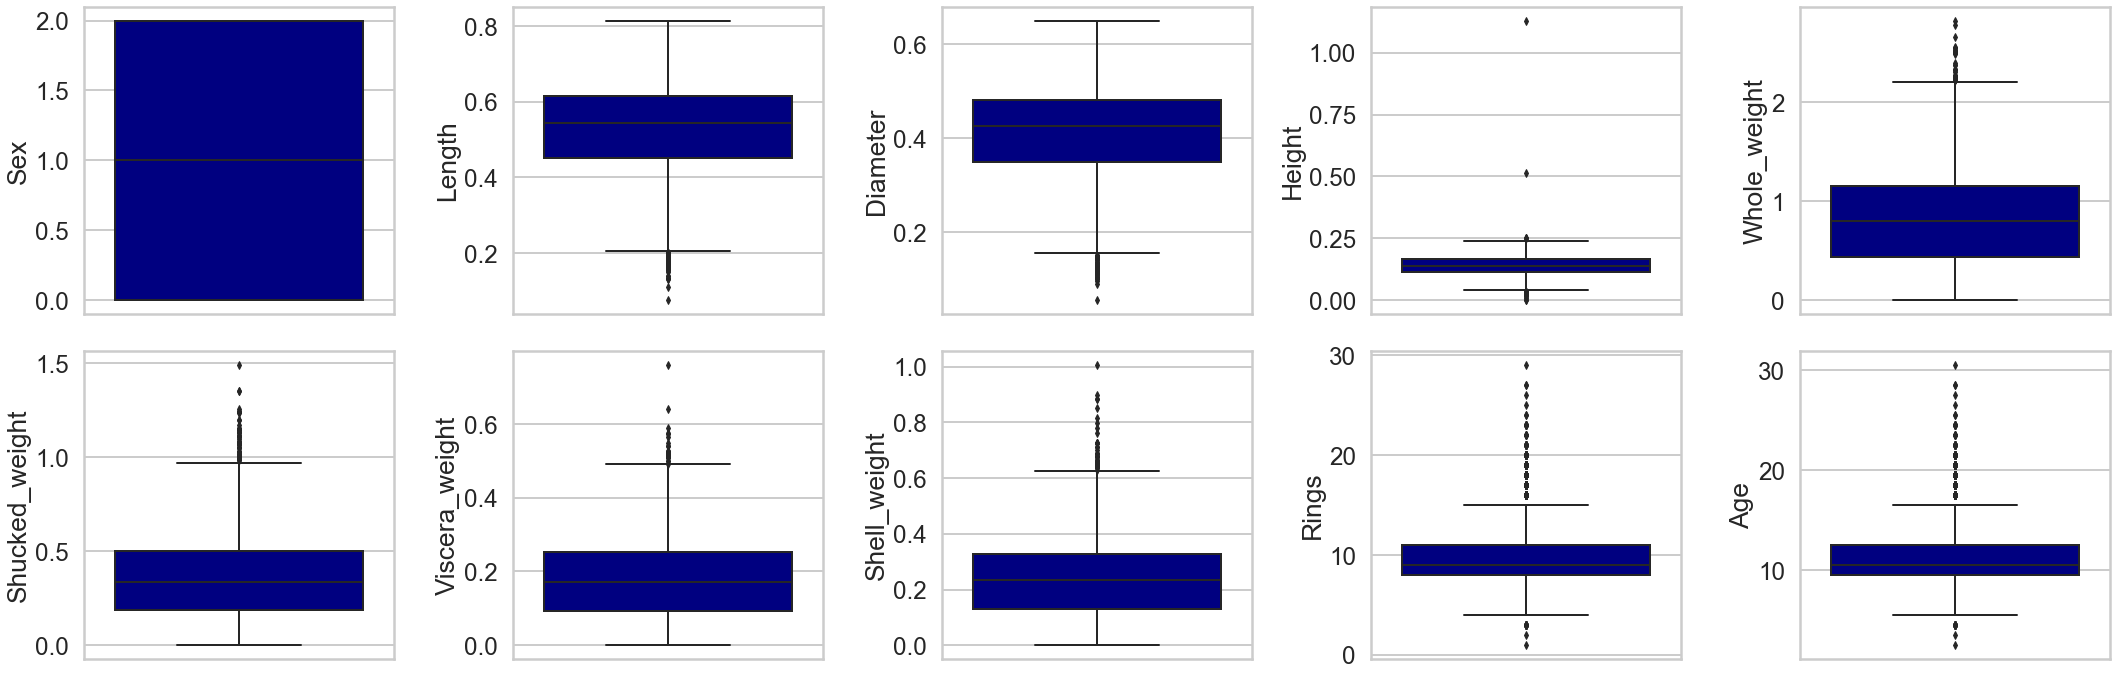


		 plotting boxplot to check presence of outliers in attributes of the dataset


In [41]:
#visualising outliers

plt.figure(figsize=(30,10))
sns.set(style='whitegrid')
sns.set_context('poster',font_scale=1.1)

for i in range(10):
    plt.subplot(2,5,i+1)
    sns.boxplot(df[col[i]], color='navy',orient='v',saturation=18,linewidth=2)
plt.tight_layout()
plt.show()
print('\n\t\t plotting boxplot to check presence of outliers in attributes of the dataset')
    

In [42]:
z=np.abs(zscore(df))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.63821689, 1.57154357,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.21298732, 0.91001299,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.20713907, 0.28962385,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.49695471, 0.28962385,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.41073914, 0.02057072,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.84048058, 0.64095986,
        0.64095986]])

In [43]:
print(np.where(z>3))

(array([   6,    6,   72,   72,   81,   83,   83,  129,  163,  164,  165,
        165,  165,  166,  166,  166,  167,  167,  168,  170,  181,  181,
        232,  232,  236,  236,  236,  237,  237,  238,  238,  239,  270,
        270,  275,  275,  277,  278,  278,  294,  294,  310,  310,  313,
        313,  314,  314,  334,  351,  351,  355,  355,  358,  358,  362,
        362,  375,  375,  416,  416,  417,  417,  428,  428,  431,  431,
        433,  433,  469,  469,  478,  478,  480,  480,  501,  501,  526,
        526,  530,  530,  572,  572,  628,  628,  673,  673,  674,  674,
        675,  675,  678,  678,  694,  696,  696,  719,  719,  720,  720,
        744,  744,  754,  754,  756,  756,  811,  811,  891,  891,  891,
       1048, 1051, 1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206, 1206,
       1207, 1207, 1207, 1207, 1209, 1209, 1257, 1417, 1417, 1418, 1422,
       1426, 1427, 1427, 1427, 1428, 1429, 1429, 1528, 1754, 1756, 1757,
       1759, 1761, 1762, 1762, 1762, 1763, 1763, 1

In [44]:
z[6][8],z[6][9]

(3.12251641377204, 3.12251641377204)

In [45]:
new_df=df[(z<3).all(axis=1)]
new_df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
1,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
2,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
3,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
4,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
5,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4173,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4174,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4175,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4176,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [46]:
print(df.shape)
print(new_df.shape)

(4177, 10)
(4027, 10)


i.e 150 rows of outliers from the data has been removed

In [47]:
#treating skewness
cl=new_df.columns.values
cl

array(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings', 'Age'],
      dtype=object)

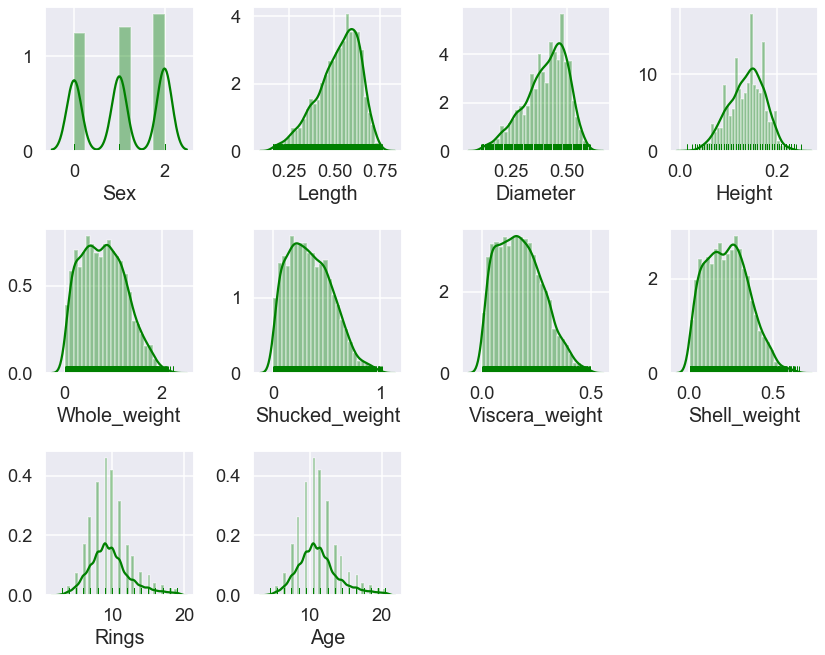

In [48]:
plt.figure(figsize=(12,15))
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=1.1)

for i in range(10):
    plt.subplot(5,4,i+1)
    sns.distplot(new_df[cl[i]],color='green',rug=True,kde=True)
    plt.tight_layout()

i.e some skewness is present ...lets calculate skewness numerically

In [49]:
new_df.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole_weight      0.334204
Shucked_weight    0.458295
Viscera_weight    0.437116
Shell_weight      0.349471
Rings             0.725464
Age               0.725464
dtype: float64

In [50]:
#skew of 0.55 is allowable so any attribute having skew value more than 
# 0.55 will be treated as skewed data and that must be removed.

for i in new_df.columns:
    if new_df.skew().loc[i]>0.55:
        new_df[i]=np.log1p(new_df[i])
print(new_df.skew())

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole_weight      0.334204
Shucked_weight    0.458295
Viscera_weight    0.437116
Shell_weight      0.349471
Rings            -0.158078
Age              -0.033222
dtype: float64


In [51]:
#dropping the no of rings columns
new_df.drop(['Rings'],axis=1,inplace=True)

In [52]:
new_df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
1,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2.862201
2,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,2.251292
3,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,2.442347
4,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,2.525729
5,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,2.251292


# correlation among the features

In [53]:
new_df_corr=new_df.corr()
new_df_corr

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
Sex,1.000000,-0.043639,-0.046531,-0.046282,-0.034776,-0.016457,-0.045292,-0.043825,-0.032315
Length,-0.043639,1.000000,0.986011,0.895432,0.934410,0.909245,0.907957,0.914518,0.632295
Diameter,-0.046531,0.986011,1.000000,0.901803,0.934069,0.904302,0.904192,0.921779,0.648162
Height,-0.046282,0.895432,0.901803,1.000000,0.891783,0.843010,0.869273,0.899716,0.662203
Whole_weight,-0.034776,0.934410,0.934069,0.891783,1.000000,0.971024,0.966612,0.961216,0.590915
Shucked_weight,-0.016457,0.909245,0.904302,0.843010,0.971024,1.000000,0.930154,0.896220,0.491372
Viscera_weight,-0.045292,0.907957,0.904192,0.869273,0.966612,0.930154,1.000000,0.919414,0.566991
Shell_weight,-0.043825,0.914518,0.921779,0.899716,0.961216,0.896220,0.919414,1.000000,0.657820
Age,-0.032315,0.632295,0.648162,0.662203,0.590915,0.491372,0.566991,0.657820,1.000000


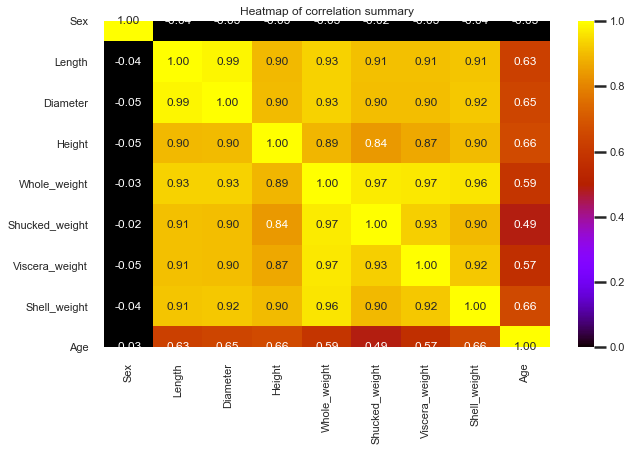

In [54]:
plt.figure(figsize=(10,6))
sns.set(style='white')
sns.set_context('poster',font_scale=0.5)
plt.title('Heatmap of correlation summary')
sns.heatmap(new_df_corr,annot=True,fmt='.2f',vmax=1,vmin=0,cmap='gnuplot')
plt.show()

as sex column is behaving negatively we can drop it

In [55]:
new_df=new_df.drop(['Sex'],axis=1)
new_df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2.862201
2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,2.251292
3,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,2.442347
4,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,2.525729
5,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,2.251292


In [56]:
new_df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2.862201
2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2.251292
3,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2.442347
4,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2.525729
5,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,2.251292
...,...,...,...,...,...,...,...,...
4173,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,2.602690
4174,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2.525729
4175,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2.442347
4176,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,2.525729


# till here data is pre processed and is cleaned at its best:

our target variable is Age ..... distribute x and y variable for further prediction stage

In [57]:
x=new_df.iloc[:,0:-1]
y=new_df.iloc[:,-1]

In [58]:
print(x.shape)
print()
print()
print(y.shape)

(4027, 7)


(4027,)


In [59]:
ss= StandardScaler()
x=ss.fit_transform(x)
print(x,'\n\n\n\nshape of x',x.shape)

[[-0.56936804 -0.42027443 -1.16620737 ... -0.6037333  -0.72305677
  -0.63065934]
 [-1.47535808 -1.4631268  -1.30180583 ... -1.20941043 -1.23110406
  -1.25603283]
 [ 0.07776771  0.15329438 -0.08141969 ... -0.44867996 -0.33113458
  -0.16162923]
 ...
 [ 0.68176107  0.72686319  1.81695876 ...  0.85473721  1.08172072
   0.60445329]
 [ 0.89747298  0.83114842  0.32537569 ...  0.88138701  0.82527781
   0.51064727]
 [ 1.63089349  1.56114509  1.54576184 ...  2.88981235  1.94298183
   2.06626381]] 



shape of x (4027, 7)


In [60]:
y=np.array(y)
print(y.shape)

(4027,)


In [61]:
y=y.reshape(-1,1)
print(y.shape)

(4027, 1)


standardScaler on x is used to standardise all the values of all attributes in a range of -1 and 1. y is converted to a numpy array and reshaped to the form of multiple row one column

in this dataset our target variable is Age and its an continous parameter , hense we willperform regression models :
    1.LinearRegression 2.DecisionTreeRegressor 3.KNeighborsRegressor 4.SVR 5.Lasso For best parameter for each model for better performance we'll use GridSearchCV incase there is a less performing algorithm we can use GradientBoostingRegressor,RandomforestRegressor for Boosting

In [62]:
#importing libraries for model preparation
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

from sklearn.linear_model import LinearRegression , Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score

from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [63]:
def mo(mod,x,y):
    max_r=0
    for i in range(30,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > max_r:
            max_r=r2score
            random_state=i
    print('the random state at ', mod,'\nis: ',random_state, 
          '\nand it produces \n r2 score of ',r2score,
          '\n mean abs error value of ', MAE,
          '\n mean squared error value of',MSE,
          '\n & root mean sq error ', RMSE)
    return random_state

In [64]:
#LinearRegression()
lr=LinearRegression()
mo(lr,x,y)

the random state at  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 
is:  82 
and it produces 
 r2 score of  0.5614699017235473 
 mean abs error value of  0.11905330752700899 
 mean squared error value of 0.02332011592856689 
 & root mean sq error  0.15270925292387127


82

In [65]:
#checking for over/under fitting using cross_val_score
lr_scr=cross_val_score(lr,x,y,cv=30,scoring='r2')
print('the r2 score at liner regression model is=', lr_scr.mean())

the r2 score at liner regression model is= 0.41392290359257006


In [66]:
#decisiontreeregressor
dtr=DecisionTreeRegressor()
dtr_para={'criterion':['mse','friedman_mse', 'mae'],'max_depth':[3,4,5]}
dtr_grid=GridSearchCV(dtr,dtr_para,cv=30)
dtr_grid.fit(x,y)
dtr_grid.best_params_

{'criterion': 'friedman_mse', 'max_depth': 5}

In [67]:
dtr=DecisionTreeRegressor(criterion='mse',max_depth=5)
mo(dtr,x,y)

the random state at  DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') 
is:  149 
and it produces 
 r2 score of  0.5792490479936486 
 mean abs error value of  0.1162931625668385 
 mean squared error value of 0.02237465801414037 
 & root mean sq error  0.14958160987949143


149

In [68]:
#checking for over/under fitting using cross_val_score
dtr_scr=cross_val_score(dtr,x,y,cv=30,scoring='r2')
print('the r2 score at DTR model is=', dtr_scr.mean())

the r2 score at DTR model is= 0.3999651682903062


In [69]:
#KNeighborsRegressor()
knr=KNeighborsRegressor()
k_para={'n_neighbors': range(4,20),'algorithm':['ball_tree', 'kd_tree', 'brute']}
k_grid=GridSearchCV(knr,k_para,cv=30)
k_grid.fit(x,y)
k_grid.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 18}

In [70]:
knr=KNeighborsRegressor(algorithm='ball_tree',n_neighbors=18)
mo(knr,x,y)

the random state at  KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                    weights='uniform') 
is:  117 
and it produces 
 r2 score of  0.584026144651348 
 mean abs error value of  0.11328124636975223 
 mean squared error value of 0.022120621978079538 
 & root mean sq error  0.14873003051865327


117

In [71]:
#checking for over/under fitting using cross_val_score
knr_scr=cross_val_score(knr,x,y,cv=30,scoring='r2')
print('the r2 score at KNR model is=', knr_scr.mean())

the r2 score at KNR model is= 0.4703705252370457


In [72]:
#SVR
svr=SVR()
svr_para={'kernel':['rbf','poly','linear'],'gamma':[0.01,0.1]}
svr_grid=GridSearchCV(svr,svr_para,cv=30)
svr_grid.fit(x,y)
svr_grid.best_params_

{'gamma': 0.1, 'kernel': 'rbf'}

In [73]:
svr=SVR(kernel='rbf',gamma=0.1)
mo(svr,x,y)

the random state at  SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 
is:  82 
and it produces 
 r2 score of  0.6226667862087489 
 mean abs error value of  0.10786112679492185 
 mean squared error value of 0.020065793257737684 
 & root mean sq error  0.14165377953919084


82

In [74]:
#checking for over/under fitting using cross_val_score
svr_scr=cross_val_score(svr,x,y,cv=30,scoring='r2')
print('the r2 score at SVR model is=', svr_scr.mean())

the r2 score at SVR model is= 0.5012545617509362


In [75]:
#WE GOT ALL THE RANDOM STATE,R2_SCORE,MAE,MSE,RMSE FROM THE ABOVE ALGORITHMS & NOW PUTTING THEM IN ONE DATAFRAME FOR PROPER VISUALIZATION

info=[['LINEAR REGRESSION',82,0.5614699017235473, 0.11905330752700899 ,0.02332011592856689 ,0.15270925292387127],
      ['Decision Tree Regressor',149, 0.5792490479936487,0.11629316256683843,0.022374658014140365 ,0.14958160987949143 ],
      ['KNeighborsRegressor',117,0.584026144651348, 0.11328124636975223,0.022120621978079538, 0.14873003051865327 ],
      ['SVR',82,0.6226667862087489, 0.10786112679492185, 0.020065793257737684,0.14165377953919084]]
perf=pd.DataFrame(info,columns=['MODEL_NAME','RANDOM_ST','R2_SCORE','MAE','MSE','RMSE'])
perf

,MODEL_NAME,RANDOM_ST,R2_SCORE,MAE,MSE,RMSE
0,LINEAR REGRESSION,82,0.561470,0.119053,0.023320,0.152709
1,Decision Tree Regressor,149,0.579249,0.116293,0.022375,0.149582
2,KNeighborsRegressor,117,0.584026,0.113281,0.022121,0.148730
3,SVR,82,0.622667,0.107861,0.020066,0.141654


from above its clear that no model is worlking well so we'll use ensambling mehods for boosting

In [76]:
rfr=RandomForestRegressor()
rfr_para={"n_estimators":[300,500],'max_depth':[5,8,9]}
rfr_grid=GridSearchCV(rfr,rfr_para,cv=20)
rfr_grid.fit(x,y)
rfr_grid.best_params_

{'max_depth': 9, 'n_estimators': 500}

In [77]:
rfr=RandomForestRegressor(n_estimators=500,max_depth=9)
mo(rfr,x,y)

the random state at  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) 
is:  57 
and it produces 
 r2 score of  0.6197947444659606 
 mean abs error value of  0.10908578948089297 
 mean squared error value of 0.0202185224470379 
 & root mean sq error  0.1421918508460942


57

In [78]:
#checking for over/under fitting using cross_val_score
rfr_scr=cross_val_score(rfr,x,y,cv=30,scoring='r2')
print('the r2 score at RFR model is=', rfr_scr.mean())

the r2 score at RFR model is= 0.48129355675923535


In [79]:
gbr=GradientBoostingRegressor()

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)
gbr_para= {"learning_rate": [0.0001,0.02],"n_estimators":[250,500,750]}
gb_grid= GridSearchCV(gbr,gbr_para,cv=30)
gb_grid.fit(x_train,y_train)
print("best parameters:", gb_grid.best_params_)
print("\n best score:",gb_grid.best_score_)

best parameters: {'learning_rate': 0.02, 'n_estimators': 750}

 best score: 0.5863053106843464


In [81]:
gbr=GradientBoostingRegressor(learning_rate=0.02,n_estimators=750)
mo(gbr,x,y)

the random state at  GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.02, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=750,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 
is:  45 
and it produces 
 r2 score of  0.6161877055882827 
 mean abs error value of  0.10963302898038936 
 mean squared error value of 0.02041033725089492 
 & root mean sq error  0.14286475160407805


45

In [82]:
from sklearn.ensemble import AdaBoostRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)
svr=SVR(kernel='rbf',gamma=0.01)
para={'n_estimators':(50,70),'learning_rate':(1.0,0.001,0.1)}
abr=AdaBoostRegressor(base_estimator=svr)
abr_grid=GridSearchCV(abr,para,cv=30)
abr_grid.fit(x_train,y_train)
print("best parameters:", abr_grid.best_params_)
print("\n best score:",abr_grid.best_score_)

best parameters: {'learning_rate': 0.1, 'n_estimators': 50}

 best score: 0.5829770648804399


In [83]:
svr=SVR(kernel='rbf',gamma=0.01)
abr=AdaBoostRegressor(base_estimator=svr,learning_rate=0.1,n_estimators=50)
mo(abr,x,y)

the random state at  AdaBoostRegressor(base_estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                     epsilon=0.1, gamma=0.01, kernel='rbf',
                                     max_iter=-1, shrinking=True, tol=0.001,
                                     verbose=False),
                  learning_rate=0.1, loss='linear', n_estimators=50,
                  random_state=None) 
is:  82 
and it produces 
 r2 score of  0.6105238462553042 
 mean abs error value of  0.11150104406387516 
 mean squared error value of 0.020711529476393865 
 & root mean sq error  0.14391500782195674


82

from the ensemble processes it is clear that ABR with SVR as base_estimator is giving best result among all the other model created so we can use ABR model as our final model...

In [84]:
#saving the model
import joblib

In [85]:
joblib.dump(abr,'ABALONE_ABR.pkl')

['ABALONE_ABR.pkl']